In [1]:
import cv2 

img = cv2.imread(r'tornadoP')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

AttributeError: 'NoneType' object has no attribute 'shape'

# Convolutional Neural Networks

# Importar Librerías

In [114]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [115]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [116]:
dirname = os.path.join(os.getcwd(), r'C:/Users/salme/FotosIA/Incidentes')
imgpath = dirname + os.sep 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Users/salme/FotosIA/Incidentes\
C:/Users/salme/FotosIA/Incidentes\asaltos 1
C:/Users/salme/FotosIA/Incidentes\incendios 8134
C:/Users/salme/FotosIA/Incidentes\inundaciones 7110
C:/Users/salme/FotosIA/Incidentes\robo 10842
C:/Users/salme/FotosIA/Incidentes\tornados 5164
Directorios leidos: 5
Imagenes en cada directorio [8135, 7110, 10842, 5164, 15738]
suma Total de imagenes en subdirs: 46989


# Creamos las etiquetas

In [117]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  46989


In [118]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 asaltos
1 incendios
2 inundaciones
3 robo
4 tornados


In [119]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [120]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (37591, 30, 30, 3) (37591,)
Testing data shape :  (9398, 30, 30, 3) (9398,)


Text(0.5, 1.0, 'Ground Truth : 4')

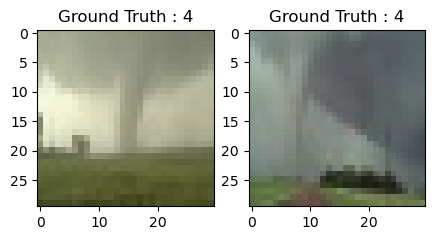

In [121]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

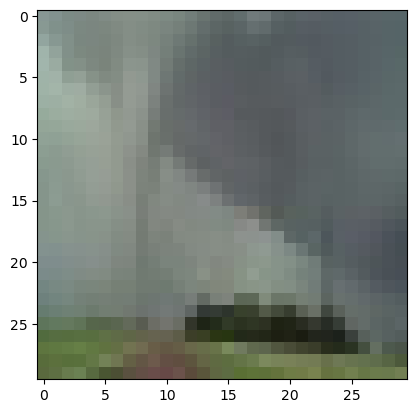

In [122]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [123]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [124]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [125]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(30072, 30, 30, 3) (7519, 30, 30, 3) (30072, 5) (7519, 5)


# Creamos el modelo de CNN

In [126]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [127]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(30,30,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [128]:
sport_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │       230,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,493 (904.27 KB)

 Trainable params: 231,493 (904.27 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR), metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [130]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3007 - loss: 1.5662 - val_accuracy: 0.4356 - val_loss: 1.3962
Epoch 2/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4120 - loss: 1.4161 - val_accuracy: 0.5457 - val_loss: 1.2232
Epoch 3/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4793 - loss: 1.2887 - val_accuracy: 0.6089 - val_loss: 1.0921
Epoch 4/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5359 - loss: 1.1848 - val_accuracy: 0.7376 - val_loss: 0.9499
Epoch 5/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6045 - loss: 1.0747 - val_accuracy: 0.7944 - val_loss: 0.8364
Epoch 6/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6578 - loss: 0.9676 - val_accuracy: 0.8175 - val_loss: 0.7387
Epoch 7/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6974 - loss: 0.8762 - val_accuracy: 0.8323 - val_loss: 0.6589
Epoch 8/20
470/470 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7257 - loss: 0.8143 - val_acc

In [131]:
sport_model.save(r"C:/Users/salme/FotosIA/keras/red.keras")


# Evaluamos la red

In [132]:

test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9322 - loss: 0.2683


In [133]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2731107473373413
Test accuracy: 0.9297723174095154


In [134]:
sport_train.history

{'accuracy': [0.3443402647972107,
  0.42750731110572815,
  0.48972466588020325,
  0.556663990020752,
  0.6229382753372192,
  0.6690941452980042,
  0.7049747109413147,
  0.7304136753082275,
  0.7500665187835693,
  0.7695530652999878,
  0.7828212380409241,
  0.7961891293525696,
  0.807628333568573,
  0.8138467669487,
  0.8249201774597168,
  0.8377892971038818,
  0.8425445556640625,
  0.848829448223114,
  0.8597033619880676,
  0.8616321086883545],
 'loss': [1.5214869976043701,
  1.3834891319274902,
  1.2634657621383667,
  1.1534159183502197,
  1.0424649715423584,
  0.9444288611412048,
  0.8601343631744385,
  0.7971579432487488,
  0.7460187077522278,
  0.696922242641449,
  0.6531076431274414,
  0.6171392202377319,
  0.5839709043502808,
  0.5591251850128174,
  0.5276517271995544,
  0.5037291049957275,
  0.479893296957016,
  0.46218425035476685,
  0.4401007890701294,
  0.42670854926109314],
 'val_accuracy': [0.43556323647499084,
  0.545684278011322,
  0.6088575720787048,
  0.7375980615615845

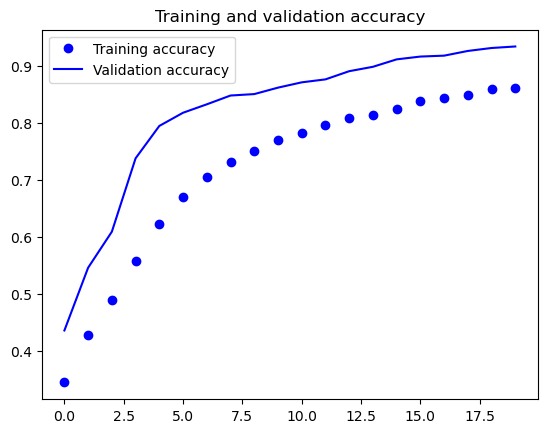

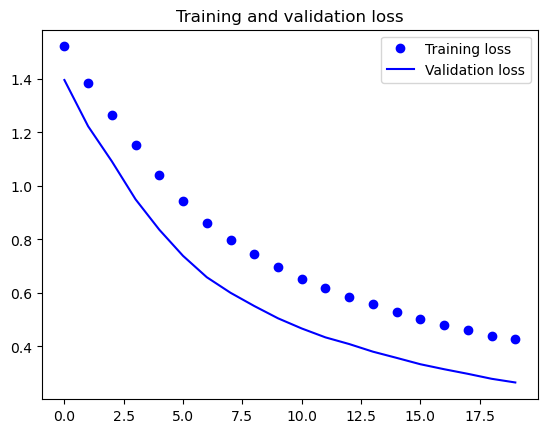

In [135]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [136]:
predicted_classes2 = sport_model.predict(test_X)

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [137]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [138]:
predicted_classes.shape, test_Y.shape

((9398,), (9398,))

# Aprendamos de los errores: Qué mejorar

Found 8738 correct labels


C:\Users\salme\AppData\Local\Temp\ipykernel_28176\1220513467.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\salme\AppData\Local\Temp\ipykernel_28176\1220513467.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


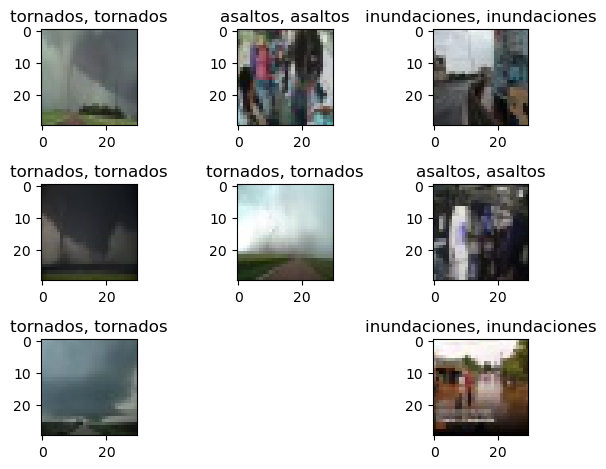

In [139]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(30,30,3), cmap='gray', interpolation='none') #CAMBIAR
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 660 incorrect labels


C:\Users\salme\AppData\Local\Temp\ipykernel_28176\3163411770.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\salme\AppData\Local\Temp\ipykernel_28176\3163411770.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


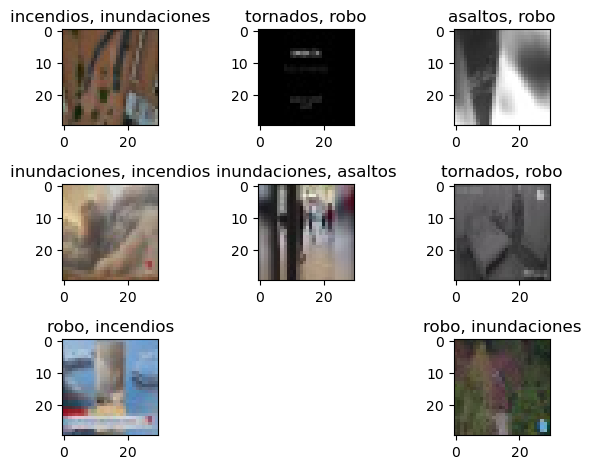

In [140]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(30,30,3), cmap='gray', interpolation='none')  #CAMBIAR
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [141]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

#nos da la precision de cada clase, algunos esta alto y otros bajos, puede ser porque se tienen pocos ejemplos de ciertas situaciones. 

              precision    recall  f1-score   support

     Class 0       0.98      0.95      0.96      1587
     Class 1       0.94      0.91      0.92      1431
     Class 2       0.89      0.90      0.89      2210
     Class 3       0.91      0.85      0.88      1090
     Class 4       0.94      0.99      0.96      3080

    accuracy                           0.93      9398
   macro avg       0.93      0.92      0.92      9398
weighted avg       0.93      0.93      0.93      9398



In [194]:
from skimage.transform import resize

images=[]
filenames = [r'C:\\Users\\salme\\FotosIA\\incendio1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (30, 30),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR TIENEN Q COINCIDIR CON EL TAMAÑO DE PIXELES.
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.
 
predicted_classes = sport_model.predict(test_X) #MODELO, no se carga archivo .h5 .keras, agarra IMG, de las que no tiene y retorna clase a la que pertenece.

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])
   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
C:\\Users\\salme\\FotosIA\\incendio1.jpg incendios
